In [ ]:
import pandas as pd
import numpy as np
from datasets import Dataset
import numpy as np
from typing import List, Tuple

In [ ]:
# Definição de caminhos dos arquivos de corpus
train_file = "Penn Treebank/Secs0-18 - training"
dev_file   = "Penn Treebank/Secs19-21 - development"
test_file  = "Penn Treebank/Secs22-24 - testing"

In [ ]:
def carregar_corpus(caminho_arquivo: str) -> str:
    """
    Lê o arquivo completo em utf-8 e retorna como string.
    """
    with open(caminho_arquivo, "r", encoding="utf-8") as f:
        return f.read()
def dividir_em_sentencas(texto: str) -> List[str]:
    """
    Divide o texto em sentenças, assumindo uma sentença por linha.
    """
    return texto.strip().split("\n")

def processar_sentenca(sentenca: str) -> List[Tuple[str, str]]:
    """
    Separa tokens de formato palavra_TAG em pares (palavra, tag).
    Converte para lowercase, exceto nomes próprios (NNP, NNPS).
    """
    tokens = sentenca.strip().split()
    pares = []
    for token in tokens:
        if "_" in token:
            palavra, tag = token.rsplit("_", 1)
            if not(tag == 'NNP' or tag == 'NNPS'):
                palavra = palavra.lower()
            pares.append((palavra, tag))
    return pares

def construir_dataframe(sentencas: List[str]) -> pd.DataFrame:
    """
    Cria um DataFrame 'longo' com colunas:
    sentenca (ID), palavra, tag e posicao_na_sentenca.
    """
    dados = []
    for sent_id, sentenca in enumerate(sentencas):
        palavras_tags = processar_sentenca(sentenca)
        for posicao, (palavra, tag) in enumerate(palavras_tags):
            dados.append({
                "sentenca": sent_id + 1,
                "palavra": palavra,
                "tag": tag,
                "posicao_na_sentenca": posicao
            })

    return pd.DataFrame(dados)

def agrupar_por_sentenca(df: pd.DataFrame) -> pd.DataFrame:
    """
    Agrupa o DataFrame por sentença e lista as palavras e tags.
    """
    sentencas_agrupadas = df.groupby('sentenca').agg({
        'palavra': lambda x: list(x),
        'tag': lambda x: list(x)
    }).reset_index()
    return sentencas_agrupadas

In [ ]:
# Carregando e processando os datasets
texto_raw_train = carregar_corpus(train_file)
sentencas_train = dividir_em_sentencas(texto_raw_train)
df_treino = construir_dataframe(sentencas_train)

# Dev + Test combinados para avaliação final
texto_raw_dev = carregar_corpus(dev_file)
texto_raw_teste = carregar_corpus(test_file)
sentencas_teste = dividir_em_sentencas(texto_raw_dev + texto_raw_teste)
df_teste = construir_dataframe(sentencas_teste)

# Exibe as primeiras linhas para verificação rápida
df_treino

,sentenca,palavra,tag,posicao_na_sentenca
0,1,Pierre,NNP,0
1,1,Vinken,NNP,1
2,1,",",",",2
3,1,61,CD,3
4,1,years,NNS,4
...,...,...,...,...
912339,38219,to,TO,21
912340,38219,San,NNP,22
912341,38219,Francisco,NNP,23
912342,38219,instead,RB,24


In [ ]:
def agrupar_por_sentenca(df: pd.DataFrame) -> pd.DataFrame:
    """
    Agrupa o DataFrame por sentença e lista as palavras e tags.
    """
    sentencas_agrupadas = df.groupby('sentenca').agg({
        'palavra': lambda x: list(x),
        'tag': lambda x: list(x)
    }).reset_index()
    return sentencas_agrupadas

# Reestruturar os dataframes
df_treino_seq = agrupar_por_sentenca(df_treino)
df_teste_seq = agrupar_por_sentenca(df_teste)

print("DataFrame de treino reestruturado:")
display(df_treino_seq.head())

print("\nDataFrame de teste reestruturado:")
display(df_teste_seq.head())

X_treino = df_treino_seq['palavra'].tolist()
y_treino = df_treino_seq['tag'].tolist()

X_teste = df_teste_seq['palavra'].tolist()
y_teste = df_teste_seq['tag'].tolist()


DataFrame de treino reestruturado:


,sentenca,palavra,tag
0,1,"[Pierre, Vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,2,"[Mr., Vinken, is, chairman, of, Elsevier, N.V....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,3,"[Rudolph, Agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,4,"[a, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,5,"[the, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."



DataFrame de teste reestruturado:


,sentenca,palavra,tag
0,1,"[the, Arizona, Corporations, Commission, autho...","[DT, NNP, NNP, NNP, VBD, DT, CD, NN, NN, NN, I..."
1,2,"[the, ruling, follows, a, host, of, problems, ...","[DT, NN, VBZ, DT, NN, IN, NNS, IN, NNP, NNP, ,..."
2,3,"[the, Arizona, regulatory, ruling, calls, for,...","[DT, NNP, JJ, NN, VBZ, IN, $, CD, CD, IN, JJ, ..."
3,4,"[the, company, had, sought, increases, totalin...","[DT, NN, VBD, VBN, NNS, VBG, $, CD, CD, ,, CC,..."
4,5,"[the, decision, was, announced, after, trading...","[DT, NN, VBD, VBN, IN, NN, VBD, .]"


In [ ]:
### PASSO 1 – Instalar dependências
!pip install -q torch tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 793.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00


In [ ]:
### PASSO 2 – Construir os vocabulários (tokens e tags)
from collections import Counter

PAD, UNK = "<pad>", "<unk>"

# ── tokens ───────────────────────────────────────────────
token_freqs = Counter(t for sent in X_treino for t in sent)
token_vocab = {PAD: 0, UNK: 1}
for tok, freq in token_freqs.items():        # mantém quem aparece ≥2×
    if freq >= 2:
        token_vocab[tok] = len(token_vocab)

# ── tags ─────────────────────────────────────────────────
tag_freqs = Counter(tag for sent in y_treino for tag in sent)
tag_vocab = {PAD: 0}
for tag in tag_freqs:
    tag_vocab[tag] = len(tag_vocab)

print(f"Vocabulário: {len(token_vocab)} tokens | {len(tag_vocab)} tags")
pad_idx_tok = token_vocab[PAD]
pad_idx_tag = tag_vocab[PAD]

Vocabulário: 22497 tokens | 46 tags


In [ ]:
### PASSO 3 – Funções de codificação (string → id)
def encode_tokens(seq):
    return [token_vocab.get(tok, token_vocab[UNK]) for tok in seq]

def encode_tags(seq):
    return [tag_vocab[tag] for tag in seq]

In [ ]:
### PASSO 4 – Dataset + DataLoader (com padding)
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

class PTBDataset(Dataset):
    def __init__(self, X, y):
        self.X = [torch.tensor(encode_tokens(s)) for s in X]
        self.y = [torch.tensor(encode_tags(t))   for t in y]
    def __len__(self):  return len(self.X)
    def __getitem__(self, idx):  return self.X[idx], self.y[idx]

def collate(batch):
    toks, tags = zip(*batch)
    lens = torch.tensor([len(seq) for seq in toks])
    toks_p = pad_sequence(toks, batch_first=True, padding_value=pad_idx_tok)
    tags_p = pad_sequence(tags, batch_first=True, padding_value=pad_idx_tag)
    return toks_p, tags_p, lens

# separa 10 % do treino como validação
val_frac = 0.1
split = int(len(X_treino)*(1-val_frac))
X_train, y_train = X_treino[:split], y_treino[:split]
X_val,   y_val   = X_treino[split:], y_treino[split:]

BATCH = 64
train_dl = DataLoader(PTBDataset(X_train, y_train), batch_size=BATCH,
                      shuffle=True, collate_fn=collate)
val_dl   = DataLoader(PTBDataset(X_val,   y_val),   batch_size=BATCH,
                      collate_fn=collate)
test_dl  = DataLoader(PTBDataset(X_teste, y_teste), batch_size=BATCH,
                      collate_fn=collate)

In [ ]:
### PASSO 5 – Modelo: Embedding → 1×RNN → Linear
import torch.nn as nn

class RNNPOSTagger(nn.Module):
    def __init__(self, vocab_size, tagset_size,
                 emb_dim=128, hidden_dim=256):
        super().__init__()
        self.emb   = nn.Embedding(vocab_size, emb_dim, padding_idx=pad_idx_tok)
        self.rnn   = nn.RNN(emb_dim, hidden_dim, batch_first=True)  # 1 camada, unidirecional
        self.proj  = nn.Linear(hidden_dim, tagset_size)

    def forward(self, x, lengths):
        x = self.emb(x)                                      # (B,L,E)
        packed = nn.utils.rnn.pack_padded_sequence(
            x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        out_packed, _ = self.rnn(packed)
        out, _ = nn.utils.rnn.pad_packed_sequence(out_packed, batch_first=True)
        logits = self.proj(out)                              # (B,L,T)
        return logits


In [ ]:
### PASSO 6 – Treinando
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model  = RNNPOSTagger(len(token_vocab), len(tag_vocab)).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=pad_idx_tag)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def run_epoch(dataloader, train=True):
    model.train(train)
    loss_sum, correct, total = 0.0, 0, 0
    for toks, tags, lens in tqdm(dataloader, leave=False):
        toks, tags, lens = toks.to(device), tags.to(device), lens.to(device)
        logits = model(toks, lens)
        loss   = criterion(logits.view(-1, len(tag_vocab)), tags.view(-1))
        if train:
            optimizer.zero_grad(); loss.backward(); optimizer.step()
        loss_sum += loss.item() * toks.size(0)
        pred = logits.argmax(-1)
        mask = tags != pad_idx_tag
        correct += (pred[mask] == tags[mask]).sum().item()
        total   += mask.sum().item()
    return loss_sum / len(dataloader.dataset), correct / total

EPOCHS = 10
for ep in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_dl, True)
    val_loss, val_acc = run_epoch(val_dl, False)
    print(f"Ep {ep:02d} | train acc {tr_acc:.3f} | val acc {val_acc:.3f}")


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 01 | train acc 0.768 | val acc 0.870


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 02 | train acc 0.904 | val acc 0.915


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 03 | train acc 0.935 | val acc 0.931


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 04 | train acc 0.950 | val acc 0.938


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 05 | train acc 0.958 | val acc 0.943


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 06 | train acc 0.964 | val acc 0.944


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 07 | train acc 0.968 | val acc 0.946


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 08 | train acc 0.971 | val acc 0.948


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 09 | train acc 0.974 | val acc 0.947


  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Ep 10 | train acc 0.977 | val acc 0.948


In [ ]:
### PASSO 7 – Avaliação final
test_loss, test_acc = run_epoch(test_dl, False)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")


  0%|          | 0/172 [00:00<?, ?it/s]

Acurácia no conjunto de teste: 0.9482


In [ ]:
### PASSO 8 – Função de inferência
id2tag = {v:k for k,v in tag_vocab.items()}

def tag_sentence(tokens: list[str]):
    model.eval()
    ids   = torch.tensor([token_vocab.get(tok, token_vocab[UNK]) for tok in tokens])[None].to(device)
    lens  = torch.tensor([len(tokens)])
    with torch.no_grad():
        logits = model(ids, lens)
    preds = logits.argmax(-1).squeeze(0).cpu().tolist()
    return list(zip(tokens, [id2tag[p] for p in preds]))

print(tag_sentence("The Federal Reserve Board meets tomorrow .".split()))


[('The', 'NNP'), ('Federal', 'NNP'), ('Reserve', 'NNP'), ('Board', 'NNP'), ('meets', 'VBZ'), ('tomorrow', 'NN'), ('.', '.')]


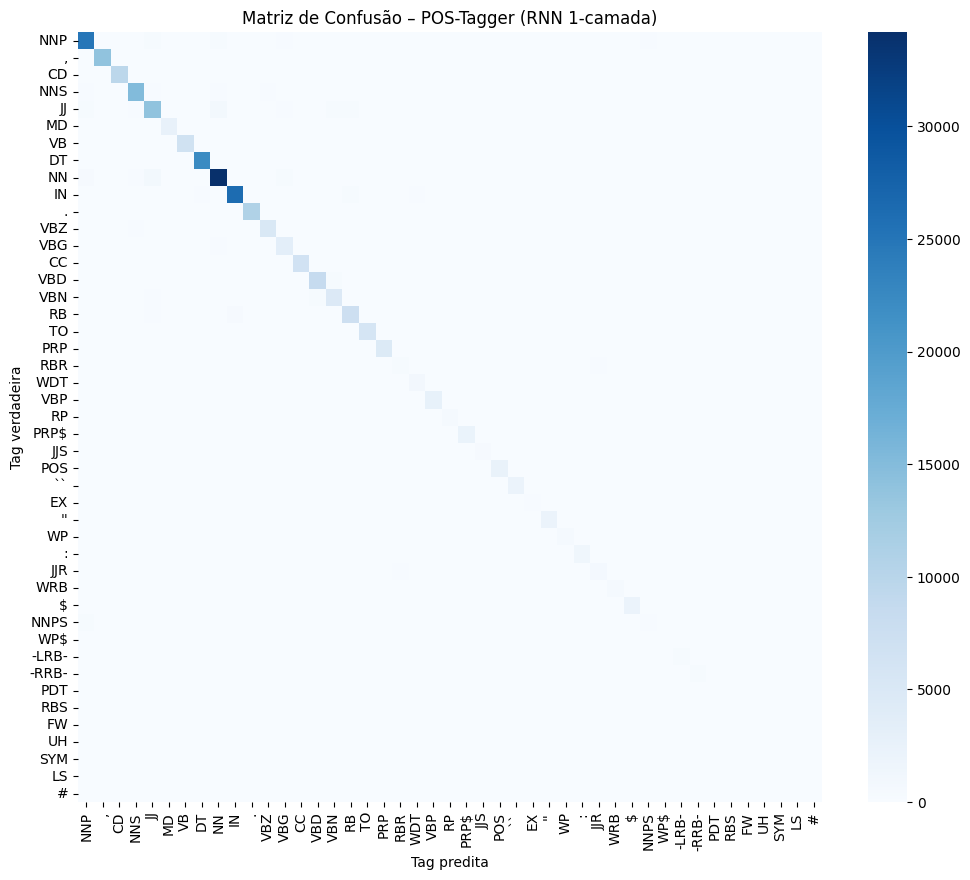

              precision    recall  f1-score   support

         NNP      0.936     0.946     0.941     26360
           ,      1.000     1.000     1.000     13963
          CD      0.960     0.968     0.964     10046
         NNS      0.954     0.943     0.948     16104
          JJ      0.862     0.856     0.859     16309
          MD      0.996     0.999     0.998      2560
          VB      0.946     0.951     0.949      7076
          DT      0.987     0.991     0.989     22413
          NN      0.942     0.940     0.941     36372
          IN      0.970     0.967     0.968     27143
           .      1.000     1.000     1.000     10849
         VBZ      0.938     0.953     0.946      5454
         VBG      0.823     0.859     0.840      3889
          CC      0.993     0.994     0.994      6630
         VBD      0.932     0.938     0.935      9182
         VBN      0.863     0.859     0.861      5532
          RB      0.890     0.869     0.879      8576
          TO      1.000    

In [ ]:
### MATRIZ DE CONFUSÃO + RELATÓRIO DE MÉTRICAS
# Instalar dependências, se necessário
!pip install -q scikit-learn seaborn matplotlib pandas

import torch, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

model.eval()

# 1) Coleta y_true e y_pred (ignorando PAD)
y_true, y_pred = [], []
with torch.no_grad():
    for toks, tags, lens in test_dl:
        toks, tags = toks.to(device), tags.to(device)
        logits = model(toks, lens.to(device))
        preds  = logits.argmax(-1)

        mask = tags != pad_idx_tag          # descarta <pad>
        y_true.extend(tags[mask].cpu().tolist())
        y_pred.extend(preds[mask].cpu().tolist())

# 2) Constrói matriz de confusão
labels   = list(range(1, len(tag_vocab)))   # pula índice 0 (<pad>)
tag_names = [id2tag[i] for i in labels]

cm = confusion_matrix(y_true, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=tag_names, columns=tag_names)

# 3) Heatmap bonitinho
plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, cmap="Blues", annot=False, fmt="d")
plt.title("Matriz de Confusão – POS-Tagger (RNN 1-camada)")
plt.ylabel("Tag verdadeira")
plt.xlabel("Tag predita")
plt.show()

# 4) Relatório de precisão / recall / F1 por tag
print(classification_report(y_true, y_pred, labels=labels,
                            target_names=tag_names, digits=3))